#### Comparison between SST averages over different regions and the AMV timeseries

The SST data is compared with the AMV. Different regions are selected based on the correlation between SST and the wind influence along the Dutch coast


The region whereof the AMV is taken is 0°N to 60°N and 80°W to 0°E


In [152]:
# Import necessary packages

import regionmask
import xarray as xr
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.tsatools


In [153]:
# Import the detrended and smoothed AMV data
amv_31 = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_31', index_col = 'time')
amv_51 = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_51', index_col = 'time')


In [154]:
# Import raw SST data 
hadisst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/hadisst_processed.nc')
cobesst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/cobesst_processed.nc')


In [155]:
# Import regression results
results_hadisst_31 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_hadisst_31.nc')
results_cobesst_31 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_cobesst_31.nc')
results_hadisst_51 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_hadisst_51.nc')
results_cobesst_51 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_cobesst_51.nc')


#### Plot the maps of the correlation coefficients

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

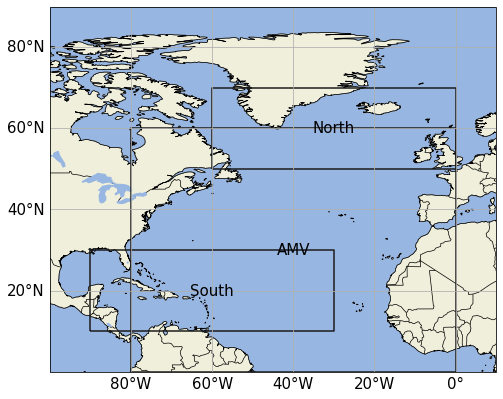

In [156]:
def regions():
    """
    Function to obtain the different regions 
    
    """
    
    # Declare regions using coordinates
    # As first coordinates take most South-West point and than go anti-clockwise
    amv = np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])
    north = np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])
    south = np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])
    
    
    # Declare names, abbreviations and numbers
    region_names = ["AMV", "North", "South"]
    region_numbers = [1,2,3]
    
    
    # Create regions 
    regions = regionmask.Regions([amv, north, south], 
                                           numbers = region_numbers, 
                                           names=region_names, name="Different SST regions")
    
    return regions


fig = plt.figure(figsize=(8,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, 10, 0, 90], ccrs.PlateCarree())

text_kws = dict(bbox=dict(color="none"), fontsize=15)

ax = regions().plot(add_ocean=True, resolution="50m", proj=ccrs.Robinson(), label='name', text_kws=text_kws)

ax.add_feature(cf.BORDERS, linewidth=.7)
ax.add_feature(cf.LAND)
ax.add_feature(cf.LAKES)
ax.coastlines(resolution='50m', linewidth=.7)
gl = ax.gridlines(draw_labels = True)
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}
gl.top_labels = False
gl.right_labels = False
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)




/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


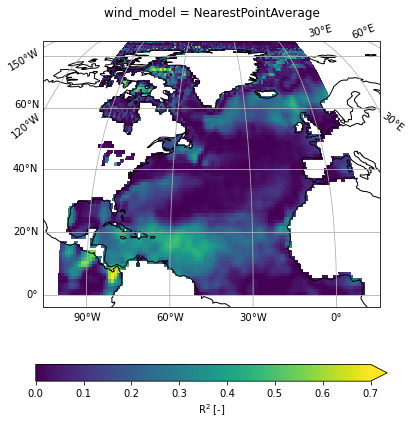

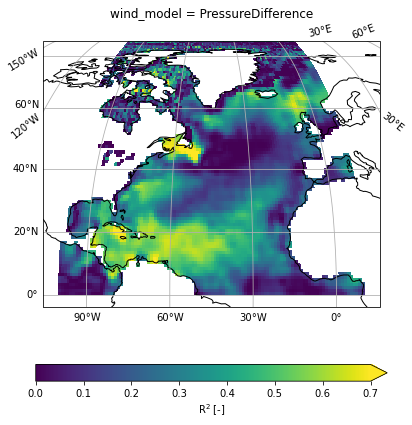

In [157]:
wind_models = ['NearestPointAverage', 'PressureDifference']

plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_31.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})







#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_31.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)



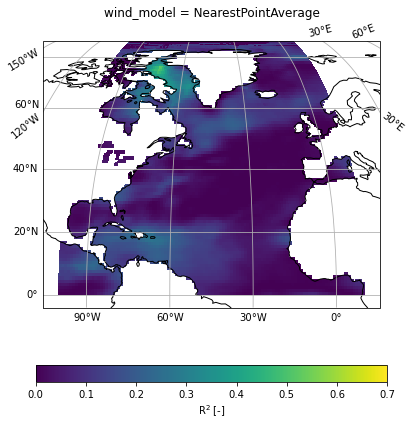

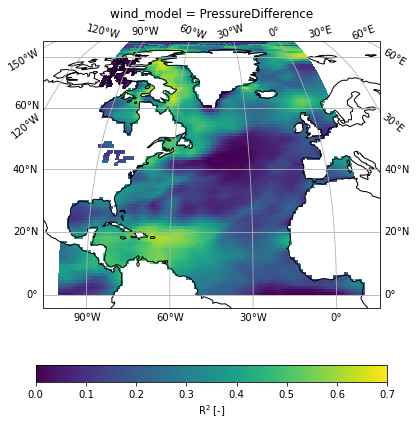

In [158]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
results_cobesst_31.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
gl.xlabels_top = False
gl.ylabels_right = False
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
ax.gridlines(draw_labels = True)
results_cobesst_31.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

gl.xlabels_top = False
gl.ylabels_right = False
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)




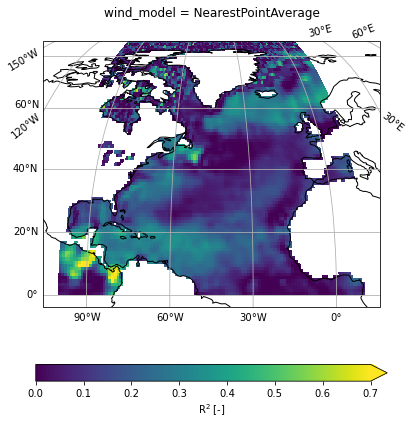

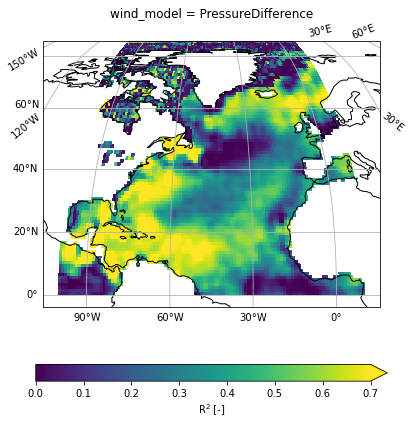

In [159]:
wind_models = ['NearestPointAverage', 'PressureDifference']

plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)



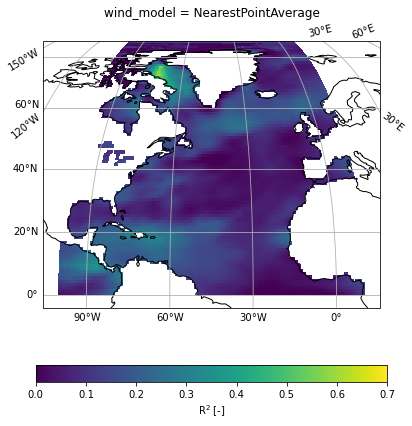

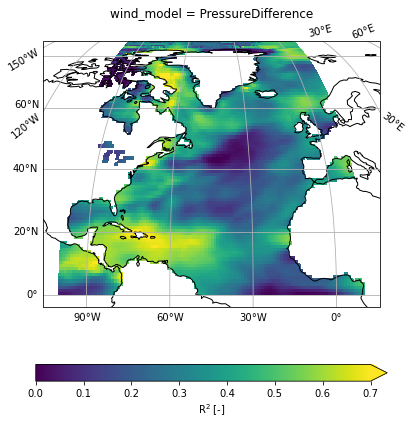

In [160]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)




#### Average SST over AMV region

<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

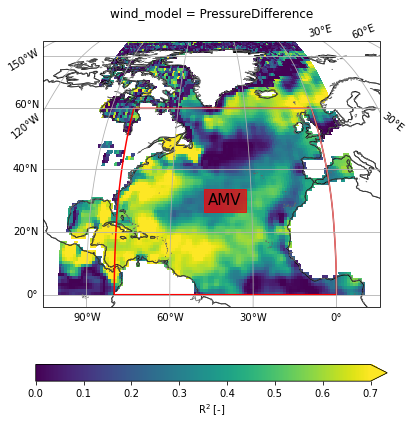

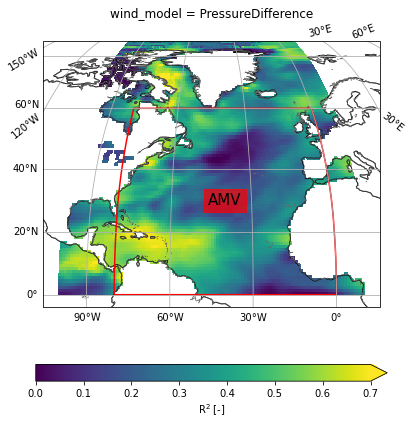

In [161]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])], 
                                           names=["AMV"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])], 
                                           names=["AMV"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)




In [162]:
# Take average over region 0°N to 60°N and 80°W to 0°E

hadisst_amv = hadisst.where((hadisst.lat < 60 ) & (hadisst.lon > -80) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_amv = cobesst.where((cobesst.lat < 60 ) & (cobesst.lon > -80) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


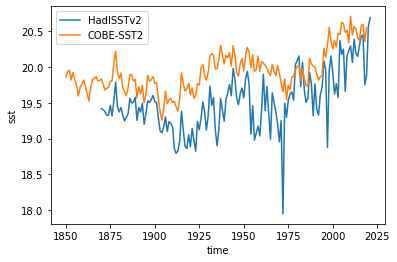

In [163]:
hadisst_amv.sst.plot()
cobesst_amv.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [164]:
# Detrend and smooth the SST over this region
hadisst_amv_dt = statsmodels.tsa.tsatools.detrend(hadisst_amv.sst, order=3, axis = 0)
cobesst_amv_dt = statsmodels.tsa.tsatools.detrend(cobesst_amv.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window

def da_smooth(da, window):
    '''
    Function to smooth a dataarray
    
    '''
    lowess = sm.nonparametric.lowess
    
    years = da.time.values
    frac = frac = window / da.time.size
    
    def lowess_1d(data):
        return lowess(data, years, frac, return_sorted = False)
    
    
    da_low = xr.apply_ufunc(lowess_1d, da, input_core_dims = [['time']], output_core_dims = [['time']], vectorize = True)
    
    return da_low

hadisst_amv_dt_sm_31 = da_smooth(hadisst_amv_dt, 31)
cobesst_amv_dt_sm_31 = da_smooth(cobesst_amv_dt, 31)
hadisst_amv_dt_sm_51 = da_smooth(hadisst_amv_dt, 51)
cobesst_amv_dt_sm_51 = da_smooth(cobesst_amv_dt, 51)


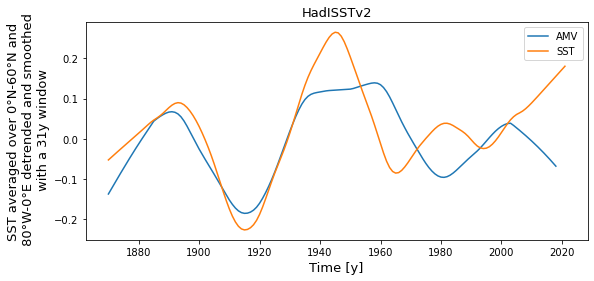

In [165]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_31.time, hadisst_amv_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over 0°N-60°N and\n 80°W-0°E detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



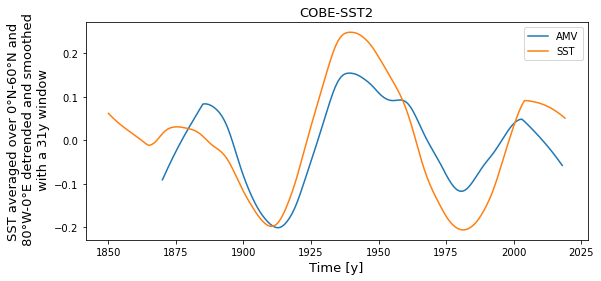

In [166]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_31.time, cobesst_amv_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over 0°N-60°N and\n 80°W-0°E detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





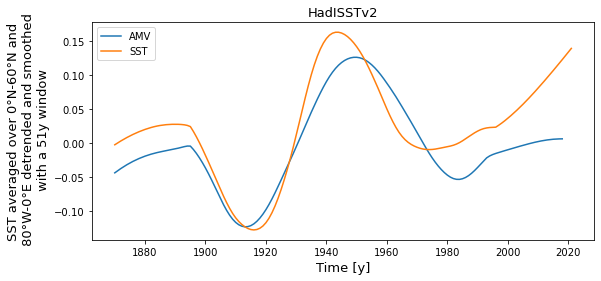

In [167]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over 0°N-60°N and\n 80°W-0°E detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



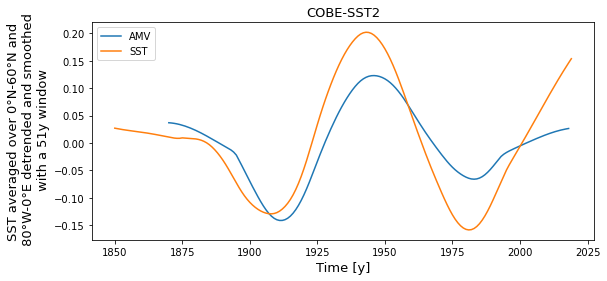

In [168]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over 0°N-60°N and\n 80°W-0°E detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### There already seems to be some kind of lag, where the SST is in front of AMV

#### Average SST over Northern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

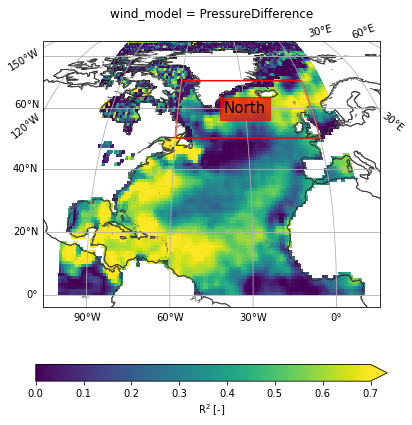

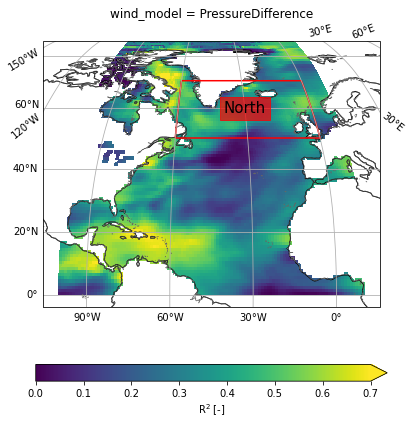

In [169]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])], 
                                           names=["North"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])], 
                                           names=["North"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [170]:
# Take average over region 

hadisst_north = hadisst.where((hadisst.lat > 50 ) & (hadisst.lat < 70 ) & (hadisst.lon > -60) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_north = cobesst.where((cobesst.lat > 50 ) & (cobesst.lat < 70 ) & (cobesst.lon > -60) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


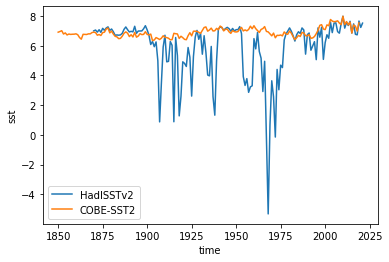

In [171]:
hadisst_north.sst.plot()
cobesst_north.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [172]:
# Detrend and smooth the SST over this region
hadisst_north_dt = statsmodels.tsa.tsatools.detrend(hadisst_north.sst, order=3, axis = 0)
cobesst_north_dt = statsmodels.tsa.tsatools.detrend(cobesst_north.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_north_dt_sm_31 = da_smooth(hadisst_north_dt, 31)
cobesst_north_dt_sm_31 = da_smooth(cobesst_north_dt, 31)
hadisst_north_dt_sm_51 = da_smooth(hadisst_north_dt, 51)
cobesst_north_dt_sm_51 = da_smooth(cobesst_north_dt, 51)


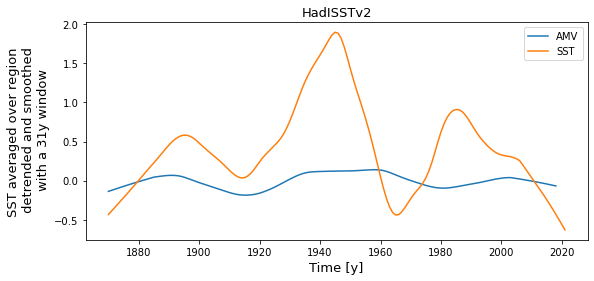

In [173]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_north_dt_sm_31.time, hadisst_north_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



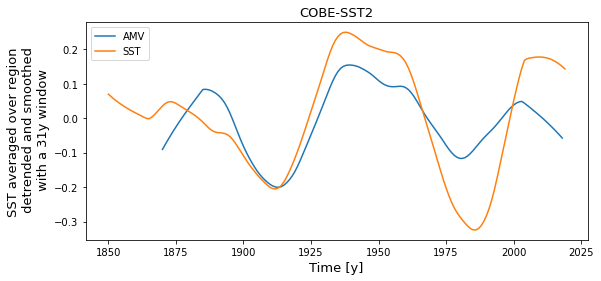

In [174]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_north_dt_sm_31.time, cobesst_north_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





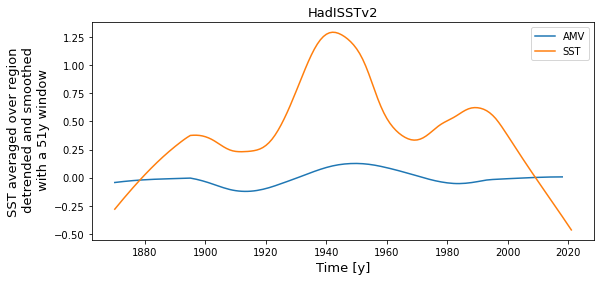

In [175]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_north_dt_sm_51.time, hadisst_north_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



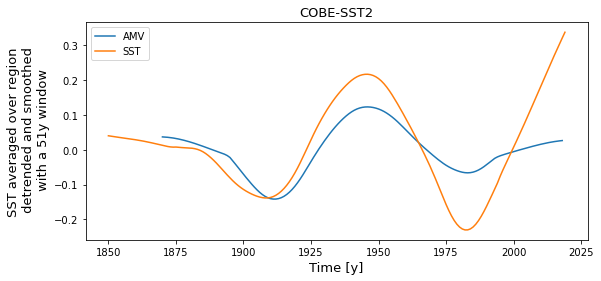

In [176]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_north_dt_sm_51.time, cobesst_north_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### The HadISST values are weird and there is no more apparent lag between northern region and amv region for cobe

#### Average SST over larger Northern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

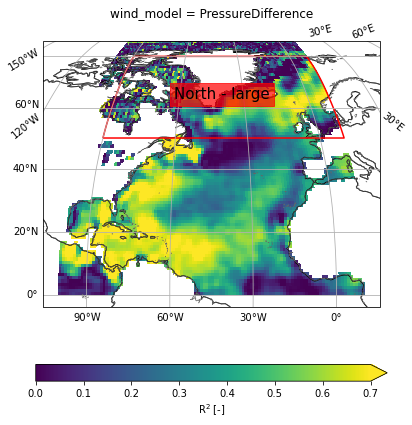

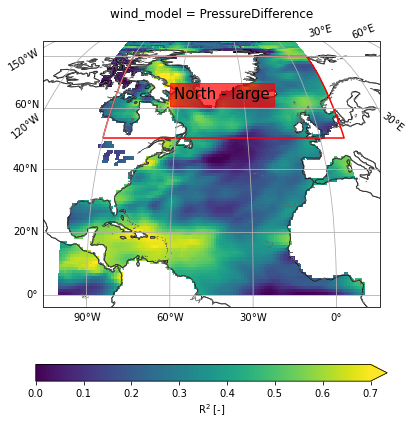

In [177]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 50], [-90, 80], [10, 80], [10, 50]])], 
                                           names=["North - large"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 50], [-90, 80], [10, 80], [10, 50]])], 
                                           names=["North - large"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [178]:
# Take average over region 

hadisst_north_l = hadisst.where((hadisst.lat > 50 ) & (hadisst.lat < 80 ) & (hadisst.lon > -90) & (hadisst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])
cobesst_north_l = cobesst.where((cobesst.lat > 50 ) & (cobesst.lat < 80 ) & (cobesst.lon > -90) & (cobesst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])


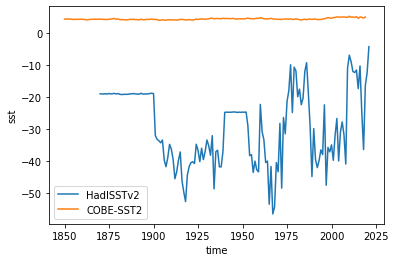

In [179]:
hadisst_north_l.sst.plot()
cobesst_north_l.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [180]:
# Detrend and smooth the SST over this region
hadisst_north_l_dt = statsmodels.tsa.tsatools.detrend(hadisst_north_l.sst, order=3, axis = 0)
cobesst_north_l_dt = statsmodels.tsa.tsatools.detrend(cobesst_north_l.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_north_l_dt_sm_31 = da_smooth(hadisst_north_l_dt, 31)
cobesst_north_l_dt_sm_31 = da_smooth(cobesst_north_l_dt, 31)
hadisst_north_l_dt_sm_51 = da_smooth(hadisst_north_l_dt, 51)
cobesst_north_l_dt_sm_51 = da_smooth(cobesst_north_l_dt, 51)


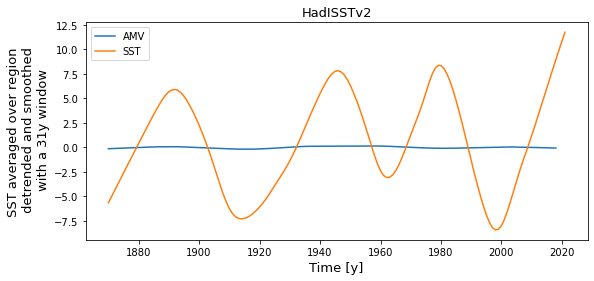

In [181]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_north_l_dt_sm_31.time, hadisst_north_l_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



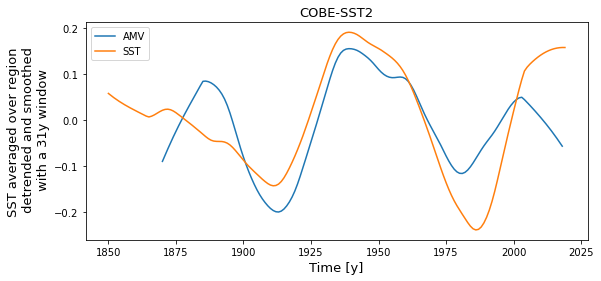

In [182]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_north_l_dt_sm_31.time, cobesst_north_l_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





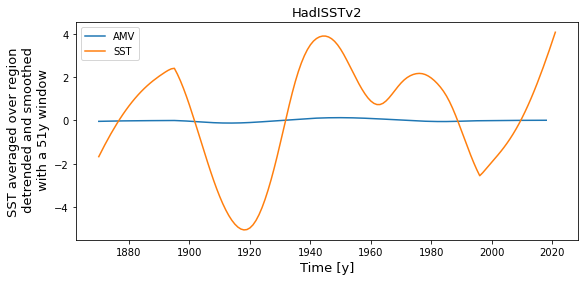

In [183]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_north_l_dt_sm_51.time, hadisst_north_l_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



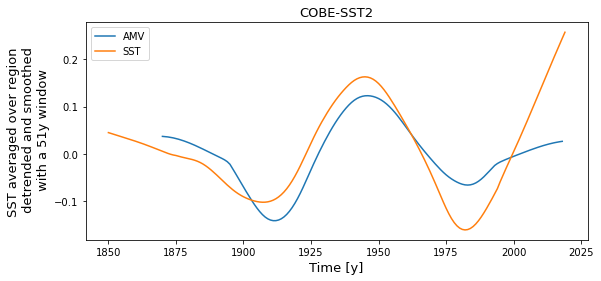

In [184]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_north_l_dt_sm_51.time, cobesst_north_l_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### The HadISST values are weird and there is no more apparent lag between northern region and amv region for cobe

#### Average SST over Southern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

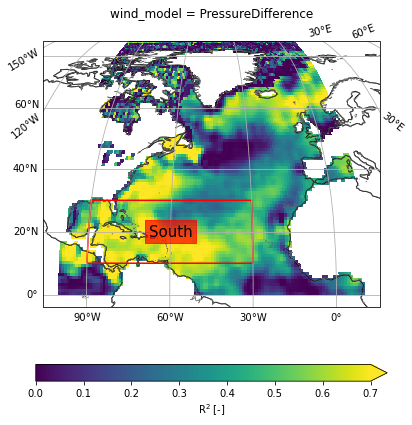

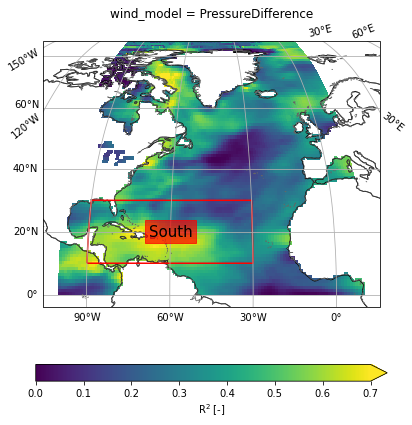

In [185]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [186]:
# Take average over region 

hadisst_south = hadisst.where((hadisst.lat > 10 ) & (hadisst.lat < 30 ) & (hadisst.lon > -90) & (hadisst.lon < -30), drop = True).mean(dim = ['lat', 'lon'])
cobesst_south = cobesst.where((cobesst.lat > 10 ) & (cobesst.lat < 30 ) & (cobesst.lon > -90) & (cobesst.lon < -30), drop = True).mean(dim = ['lat', 'lon'])


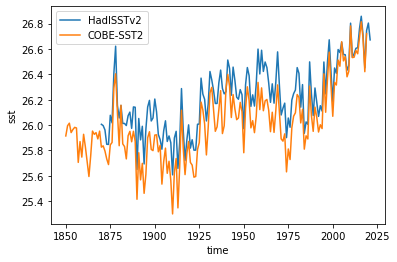

In [187]:
hadisst_south.sst.plot()
cobesst_south.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [188]:
# Detrend and smooth the SST over this region
hadisst_south_dt = statsmodels.tsa.tsatools.detrend(hadisst_south.sst, order=3, axis = 0)
cobesst_south_dt = statsmodels.tsa.tsatools.detrend(cobesst_south.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_south_dt_sm_31 = da_smooth(hadisst_south_dt, 31)
cobesst_south_dt_sm_31 = da_smooth(cobesst_south_dt, 31)
hadisst_south_dt_sm_51 = da_smooth(hadisst_south_dt, 51)
cobesst_south_dt_sm_51 = da_smooth(cobesst_south_dt, 51)


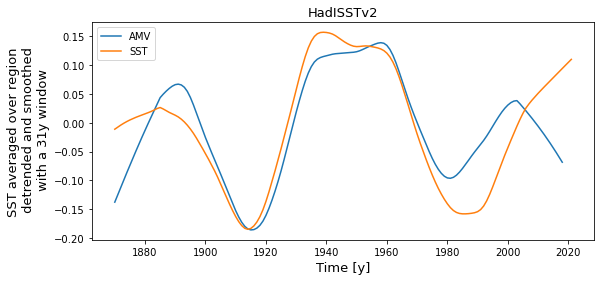

In [189]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_dt_sm_31.time, hadisst_south_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



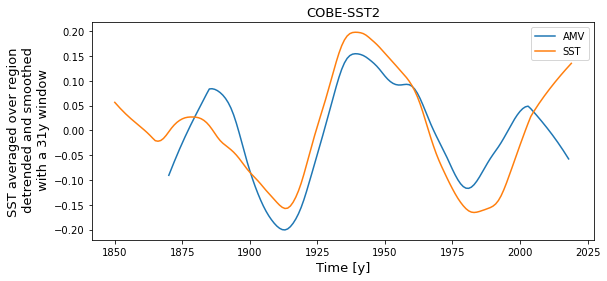

In [190]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_dt_sm_31.time, cobesst_south_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





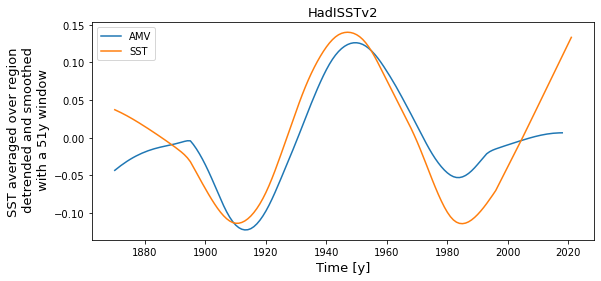

In [191]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



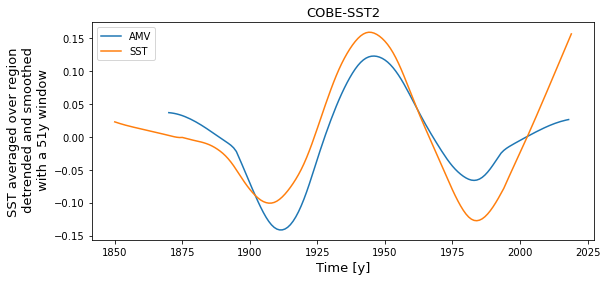

In [192]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### There is no more apparent lag between souther region and amv region 

#### Average SST over larger Southern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

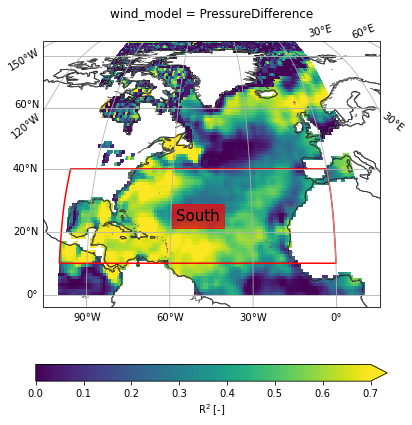

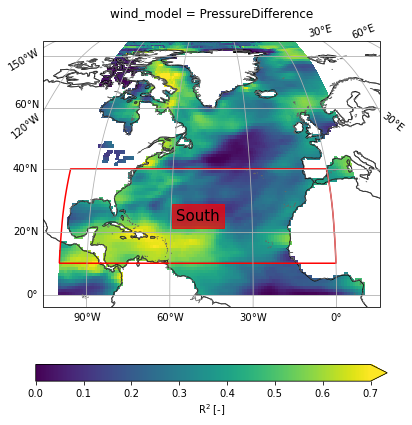

In [193]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-100, 10], [-100, 40], [0, 40], [0, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-100, 10], [-100, 40], [0, 40], [0, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [194]:
# Take average over region 

hadisst_south_l = hadisst.where((hadisst.lat > 10 ) & (hadisst.lat < 40 ) & (hadisst.lon > -100) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_south_l = cobesst.where((cobesst.lat > 10 ) & (cobesst.lat < 40 ) & (cobesst.lon > -100) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


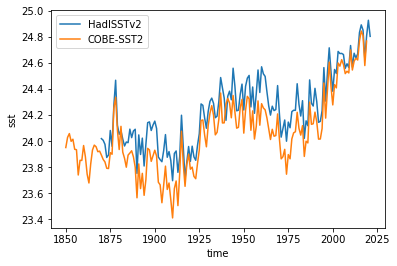

In [195]:
hadisst_south_l.sst.plot()
cobesst_south_l.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [196]:
# Detrend and smooth the SST over this region
hadisst_south_l_dt = statsmodels.tsa.tsatools.detrend(hadisst_south_l.sst, order=3, axis = 0)
cobesst_south_l_dt = statsmodels.tsa.tsatools.detrend(cobesst_south_l.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_south_l_dt_sm_31 = da_smooth(hadisst_south_l_dt, 31)
cobesst_south_l_dt_sm_31 = da_smooth(cobesst_south_l_dt, 31)
hadisst_south_l_dt_sm_51 = da_smooth(hadisst_south_l_dt, 51)
cobesst_south_l_dt_sm_51 = da_smooth(cobesst_south_l_dt, 51)


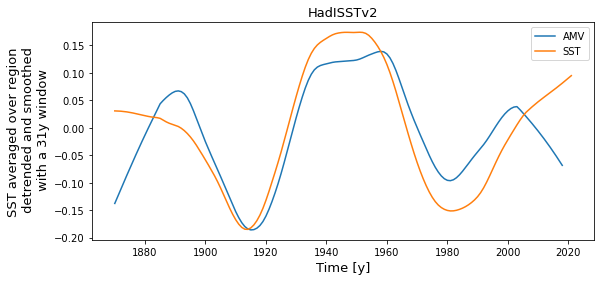

In [197]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_l_dt_sm_31.time, hadisst_south_l_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



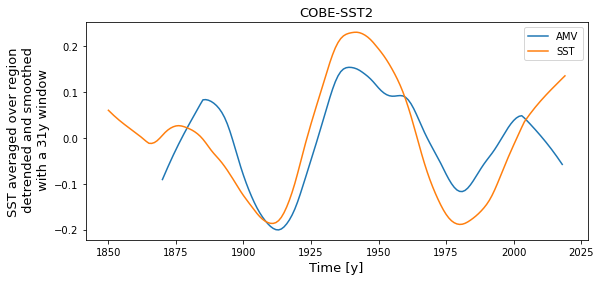

In [198]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_l_dt_sm_31.time, cobesst_south_l_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





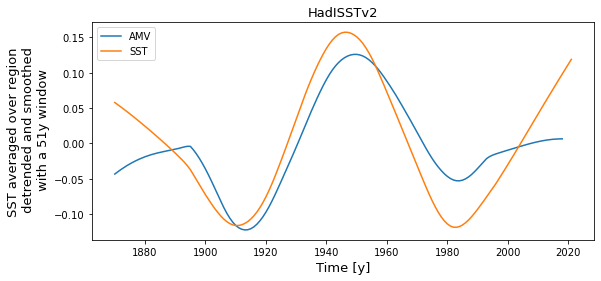

In [199]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_l_dt_sm_51.time, hadisst_south_l_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



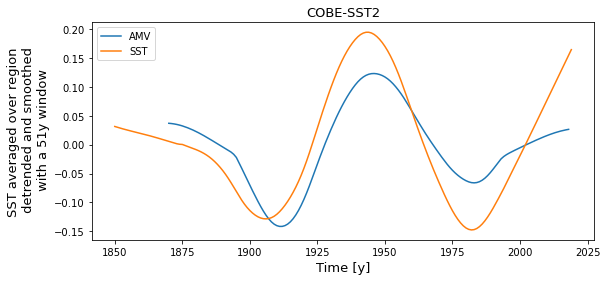

In [200]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_l_dt_sm_51.time, cobesst_south_l_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### ?

#### Average SST over Eastern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

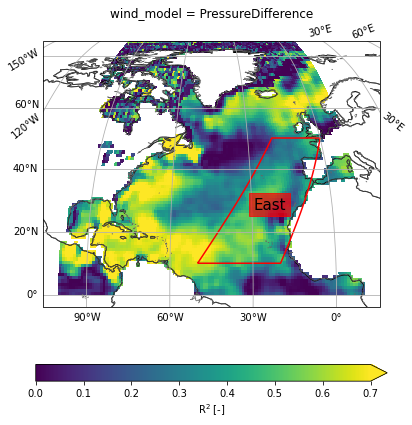

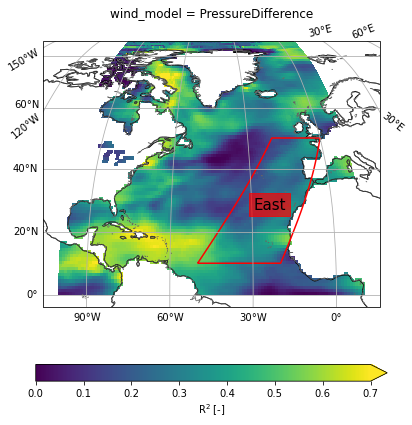

In [201]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], 
                                           names=["East"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], 
                                           names=["East"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [202]:
# Take average over region 

hadisst_mask = regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], names=["East"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], names=["East"], numbers = [1]).mask(hadisst)


hadisst_east = hadisst.where(mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_east = cobesst.where(mask == 1, drop = True).mean(dim = ['lat', 'lon'])

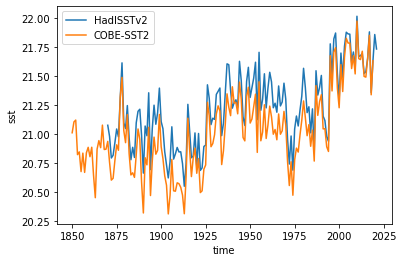

In [203]:
hadisst_east.sst.plot()
cobesst_east.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [204]:
# Detrend and smooth the SST over this region
hadisst_east_dt = statsmodels.tsa.tsatools.detrend(hadisst_east.sst, order=3, axis = 0)
cobesst_east_dt = statsmodels.tsa.tsatools.detrend(cobesst_east.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_east_dt_sm_31 = da_smooth(hadisst_east_dt, 31)
cobesst_east_dt_sm_31 = da_smooth(cobesst_east_dt, 31)
hadisst_east_dt_sm_51 = da_smooth(hadisst_east_dt, 51)
cobesst_east_dt_sm_51 = da_smooth(cobesst_east_dt, 51)


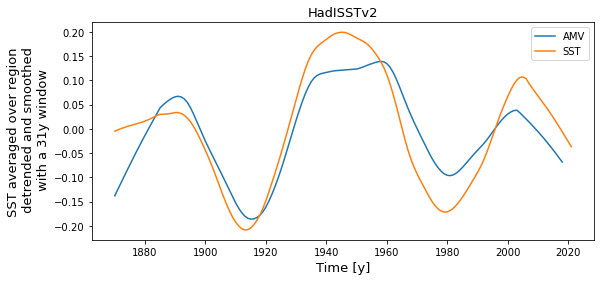

In [205]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_east_dt_sm_31.time, hadisst_east_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



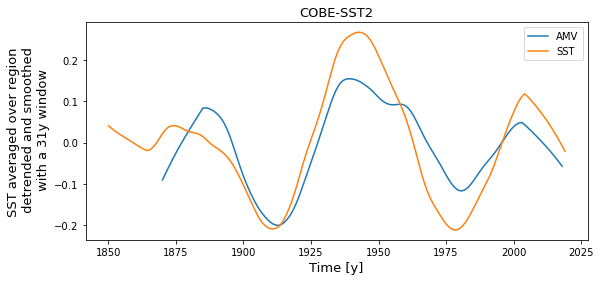

In [206]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_east_dt_sm_31.time, cobesst_east_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





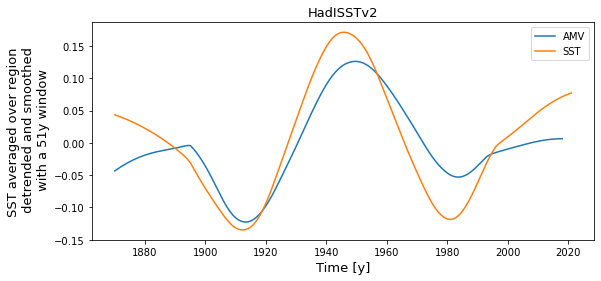

In [207]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



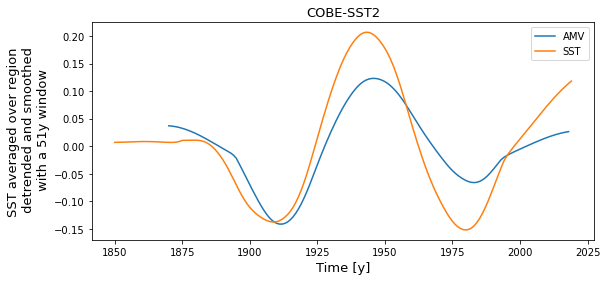

In [208]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





##### ?

#### Average SST over Western region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

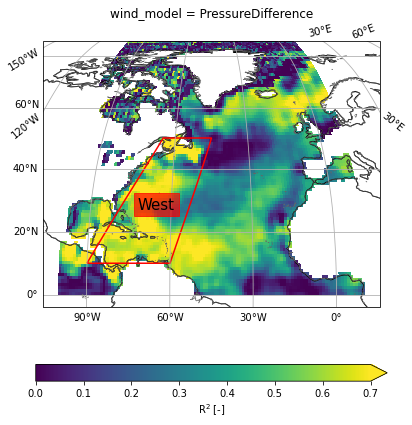

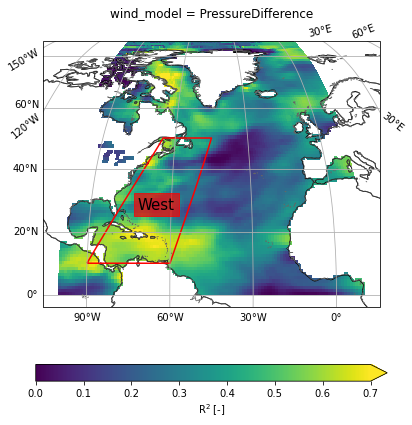

In [215]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], 
                                           names=["West"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], 
                                           names=["West"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [216]:
# Take average over region 

hadisst_mask = regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], names=["East"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], names=["East"], numbers = [1]).mask(hadisst)


hadisst_west = hadisst.where(mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_west = cobesst.where(mask == 1, drop = True).mean(dim = ['lat', 'lon'])

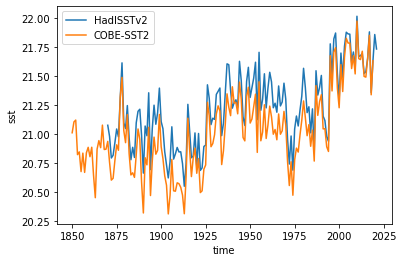

In [217]:
hadisst_west.sst.plot()
cobesst_west.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [218]:
# Detrend and smooth the SST over this region
hadisst_west_dt = statsmodels.tsa.tsatools.detrend(hadisst_west.sst, order=3, axis = 0)
cobesst_west_dt = statsmodels.tsa.tsatools.detrend(cobesst_west.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year and 51-year smoothing window


hadisst_west_dt_sm_31 = da_smooth(hadisst_west_dt, 31)
cobesst_west_dt_sm_31 = da_smooth(cobesst_west_dt, 31)
hadisst_west_dt_sm_51 = da_smooth(hadisst_west_dt, 51)
cobesst_west_dt_sm_51 = da_smooth(cobesst_west_dt, 51)


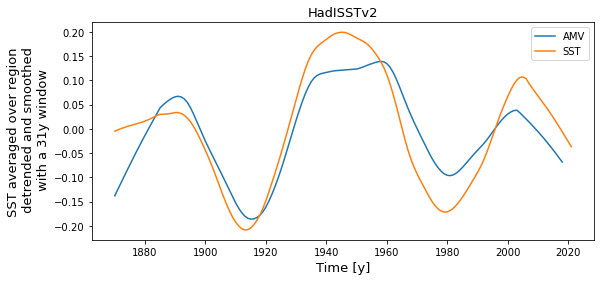

In [219]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_west_dt_sm_31.time, hadisst_west_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



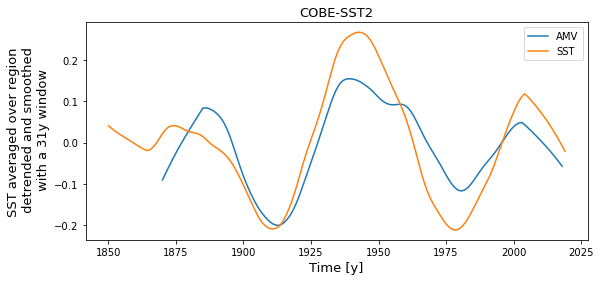

In [220]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_west_dt_sm_31.time, cobesst_west_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





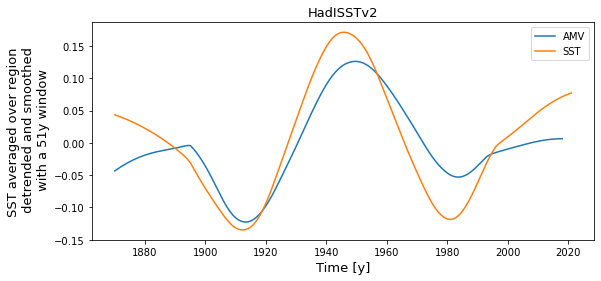

In [221]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



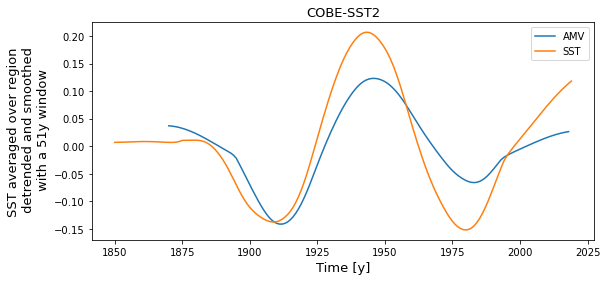

In [222]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend()





#### Plot all results together

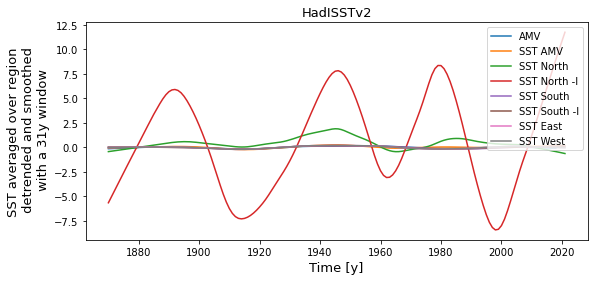

In [226]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_31.time, hadisst_amv_dt_sm_31, label = 'SST AMV')
plt.plot(hadisst_north_dt_sm_31.time, hadisst_north_dt_sm_31, label = 'SST North')
plt.plot(hadisst_north_l_dt_sm_31.time, hadisst_north_l_dt_sm_31, label = 'SST North -l')
plt.plot(hadisst_south_dt_sm_31.time, hadisst_south_dt_sm_31, label = 'SST South')
plt.plot(hadisst_south_l_dt_sm_31.time, hadisst_south_l_dt_sm_31, label = 'SST South -l')
plt.plot(hadisst_east_dt_sm_31.time, hadisst_east_dt_sm_31, label = 'SST East')
plt.plot(hadisst_west_dt_sm_31.time, hadisst_west_dt_sm_31, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend()



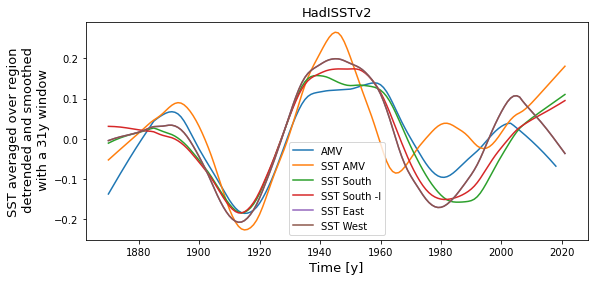

In [227]:
plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_31.time, hadisst_amv_dt_sm_31, label = 'SST AMV')
#plt.plot(hadisst_north_dt_sm_31.time, hadisst_north_dt_sm_31, label = 'SST North')
#plt.plot(hadisst_north_l_dt_sm_31.time, hadisst_north_l_dt_sm_31, label = 'SST North -l')
plt.plot(hadisst_south_dt_sm_31.time, hadisst_south_dt_sm_31, label = 'SST South')
plt.plot(hadisst_south_l_dt_sm_31.time, hadisst_south_l_dt_sm_31, label = 'SST South -l')
plt.plot(hadisst_east_dt_sm_31.time, hadisst_east_dt_sm_31, label = 'SST East')
plt.plot(hadisst_west_dt_sm_31.time, hadisst_west_dt_sm_31, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend(loc = 'upper left')




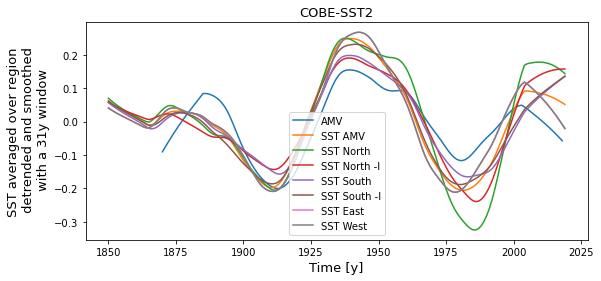

In [228]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_31.time, cobesst_amv_dt_sm_31, label = 'SST AMV')
plt.plot(cobesst_north_dt_sm_31.time, cobesst_north_dt_sm_31, label = 'SST North')
plt.plot(cobesst_north_l_dt_sm_31.time, cobesst_north_l_dt_sm_31, label = 'SST North -l')
plt.plot(cobesst_south_dt_sm_31.time, cobesst_south_dt_sm_31, label = 'SST South')
plt.plot(cobesst_south_l_dt_sm_31.time, cobesst_south_l_dt_sm_31, label = 'SST South -l')
plt.plot(cobesst_east_dt_sm_31.time, cobesst_east_dt_sm_31, label = 'SST East')
plt.plot(cobesst_west_dt_sm_31.time, cobesst_west_dt_sm_31, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 31y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend(loc = 'upper left')





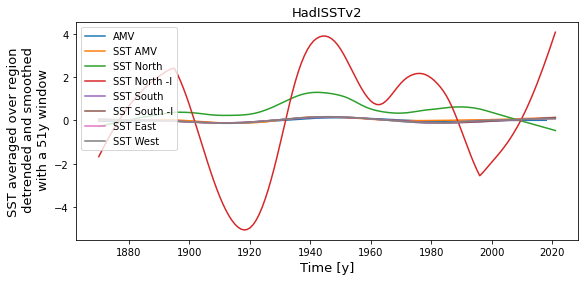

In [231]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST AMV')
plt.plot(hadisst_north_dt_sm_51.time, hadisst_north_dt_sm_51, label = 'SST North')
plt.plot(hadisst_north_l_dt_sm_51.time, hadisst_north_l_dt_sm_51, label = 'SST North -l')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST South')
plt.plot(hadisst_south_l_dt_sm_51.time, hadisst_south_l_dt_sm_51, label = 'SST South -l')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST East')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend(loc = 'upper left')



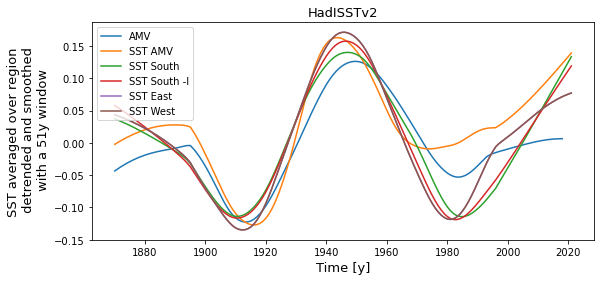

In [232]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST AMV')
#plt.plot(hadisst_north_dt_sm_51.time, hadisst_north_dt_sm_51, label = 'SST North')
#plt.plot(hadisst_north_l_dt_sm_51.time, hadisst_north_l_dt_sm_51, label = 'SST North -l')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST South')
plt.plot(hadisst_south_l_dt_sm_51.time, hadisst_south_l_dt_sm_51, label = 'SST South -l')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST East')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('HadISSTv2', fontsize = 13)
plt.legend(loc = 'upper left')




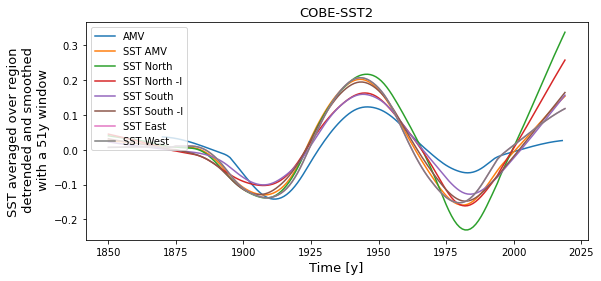

In [230]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST AMV')
plt.plot(cobesst_north_dt_sm_51.time, cobesst_north_dt_sm_51, label = 'SST North')
plt.plot(cobesst_north_l_dt_sm_51.time, cobesst_north_l_dt_sm_51, label = 'SST North -l')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST South')
plt.plot(cobesst_south_l_dt_sm_51.time, cobesst_south_l_dt_sm_51, label = 'SST South -l')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST East')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST West')
plt.xlabel('Time [y]', fontsize = 13)
plt.ylabel('SST averaged over region\n detrended and smoothed\n with a 51y window', fontsize = 13)
plt.title('COBE-SST2', fontsize = 13)
plt.legend(loc = 'upper left')



